In [1]:
#%% import pakages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pickle

In [2]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()

In [3]:
df_dataset=pd.read_excel('dataset_meta.xlsx', sheet_name='rawData', index_col=0)
df_dataset = df_dataset.rename(columns={'meter_reading':'Data points'})
df_dataset['site_id'] = 'Site' + df_dataset['site_id'].astype('str')
df_dataset

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,Data points,meter_type,timezone
0,Site0,0,Education,7432,2008.0,NaN,0,8784,Electricity,US/Eastern
1,Site0,1,Education,2720,2004.0,NaN,0,8784,Electricity,US/Eastern
2,Site0,2,Education,5376,1991.0,NaN,0,8784,Electricity,US/Eastern
3,Site0,3,Education,23685,2002.0,NaN,0,8784,Electricity,US/Eastern
4,Site0,4,Education,116607,1975.0,NaN,0,8784,Electricity,US/Eastern
...,...,...,...,...,...,...,...,...,...,...
2375,Site15,1444,Entertainment/public assembly,19619,1914.0,NaN,0,7445,Electricity,US/Eastern
2376,Site15,1445,Education,4298,NaN,NaN,0,7449,Electricity,US/Eastern
2377,Site15,1446,Entertainment/public assembly,11265,1997.0,NaN,0,7472,Electricity,US/Eastern
2378,Site15,1447,Lodging/residential,29775,2001.0,NaN,0,7471,Electricity,US/Eastern


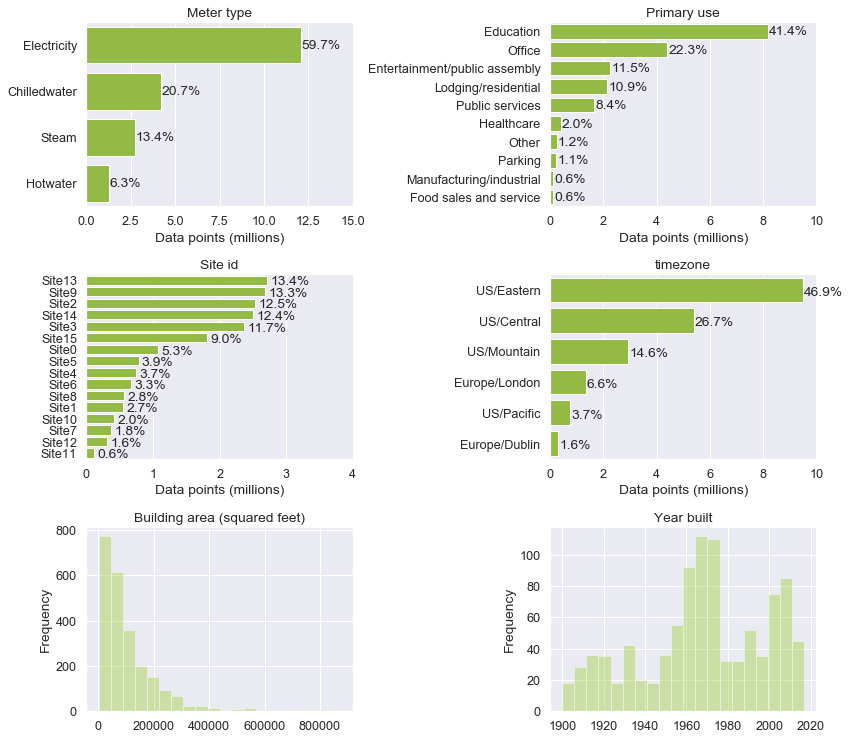

In [4]:
nr_rows = 3
nr_cols = 2

color = "yellowgreen"
sns.set(font_scale = 1.15)
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*6,nr_rows*3.5))
        
#Fig 1: Data points of each meter type
# Temporary dataset
df_temp = df_dataset[['meter_type','Data points']].groupby('meter_type').sum().sort_values('Data points', ascending=False).reset_index()
df_temp.rename(columns={'meter_type':'meter type'}, inplace=True)
df_temp['Data points'] = df_temp['Data points']/10**6
# Plot
ax1 = sns.barplot(y="meter type", x="Data points", color= color, 
            data=df_temp,ax = axs[0][0])
ax1.title.set_text("Meter type")
ax1.set(ylabel="", xlabel="Data points (millions)", xlim=(0, 1.5*10))
# Adds percentage 
total = df_temp['Data points'].sum().sum()
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.05
        y = p.get_y() + p.get_height()/1.7
        ax1.annotate(percentage, (x, y))
        
#Fig 2: Data points of each primary use
# Temporary dataset
df_temp = df_dataset[['primary_use','Data points']].groupby('primary_use').sum().sort_values('Data points', ascending=False).reset_index().iloc[:10,:]
df_temp.rename(columns={'primary_use':'primary use'}, inplace=True)
df_temp['Data points'] = df_temp['Data points']/10**6
# Plot
ax2 = sns.barplot(y="primary use", x="Data points", color= color, 
            data=df_temp,ax = axs[0][1])
ax2.title.set_text("Primary use")
ax2.set(ylabel="", xlabel="Data points (millions)", xlim=(0, 10))
# Adds percentage 
total = df_temp['Data points'].sum().sum()
for p in ax2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.05
        y = p.get_y() + p.get_height()/1.35
        ax2.annotate(percentage, (x, y))
        
#Fig 3: Data points in each site
# Temporary dataset
df_temp = df_dataset[['site_id','Data points']].groupby('site_id').sum().sort_values('Data points', ascending=False).reset_index()
df_temp.rename(columns={'site_id':'site id'}, inplace=True)
df_temp['Data points'] = df_temp['Data points']/10**6
# Plot
ax3 = sns.barplot(y="site id", x="Data points", color= color, 
            data=df_temp,ax = axs[1][0])
ax3.title.set_text("Site id")
ax3.set(ylabel="", xlabel="Data points (millions)", xlim=(0, 4))
# Adds percentage 
total = df_temp['Data points'].sum().sum()
for p in ax3.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.05
        y = p.get_y() + p.get_height()/1
        ax3.annotate(percentage, (x, y))
        
#Fig 4: Data points in each timezone
# Temporary dataset
df_temp = df_dataset[['timezone','Data points']].groupby('timezone').sum().sort_values('Data points', ascending=False).reset_index()
df_temp.rename(columns={'timezone':'timezone'}, inplace=True)
df_temp['Data points'] = df_temp['Data points']/10**6
# Plot
ax4 = sns.barplot(y="timezone", x="Data points", color= color, 
            data=df_temp,ax = axs[1][1])
ax4.title.set_text("timezone")
ax4.set(ylabel="", xlabel="Data points (millions)", xlim=(0, 10))
# Adds percentage 
total = df_temp['Data points'].sum().sum()
for p in ax4.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.05
        y = p.get_y() + p.get_height()/1.4
        ax4.annotate(percentage, (x, y))
        
#Fig 5: 
ax5 = sns.distplot(df_dataset['square_feet'], kde=False, bins=20, color= color, ax = axs[2][0])
ax5.title.set_text("Building area (squared feet)")
ax5.set(ylabel="Frequency", xlabel="")

#Fig 6: 
ax6 = sns.distplot(df_dataset['year_built'], kde=False, bins=20, color= color, ax = axs[2][1])
ax6.title.set_text("Year built")
ax6.set(ylabel="Frequency", xlabel="")
        
plt.tight_layout()    
fig.savefig("meta_summary.png", dpi=300)

In [5]:
df_notebooks_noTagged=pd.read_pickle('ASHRAE-Kaggle_notebooks_meta.pkl')
df_notebooks=pd.read_excel('ASHRAE-Kaggle_notebooks_meta(Tagged).xlsx', )
df_notebooks = df_notebooks.drop(['title','tags','data'],axis=1).merge(df_notebooks_noTagged[['title','scriptUrl', 'tags', 'data']], on='scriptUrl')
df_notebooks

,scriptUrl,languageName,bestPublicScore,isGpuEnabled,lastRunExecutionTimeSeconds,medal,totalComments,totalForks,totalViews,totalVotes,Models\t,EDA,Cleaning\t,Visualization\t,Feature Engineering,Leak data usage,title,tags,data
0,https://www.kaggle.com/rohanrao/ashrae-half-an...,Python,1.100,False,3115,gold,73,0,0,364,gradient boosting,0.0,0.0,0.0,0.0,0,ASHRAE: Half and Half,"[beginner, gradient boosting, regression, star...","[ASHRAE - Great Energy Predictor III, nan, nan..."
1,https://www.kaggle.com/caesarlupum/ashrae-star...,Python,NaN,False,861,gold,200,0,0,756,NaN,1.0,1.0,1.0,0.0,0,🔌⚡ASHRAE -Start Here: A GENTLE Introduction,"[beginner, data cleaning, data visualization, ...","[ASHRAE - Great Energy Predictor III, nan, nan..."
2,https://www.kaggle.com/nroman/eda-for-ashrae,Python,NaN,False,779,gold,48,0,0,386,NaN,1.0,0.0,0.0,0.0,0,EDA for ASHRAE,"[nan, nan, nan, nan, nan]","[ASHRAE - Great Energy Predictor III, nan, nan..."
3,https://www.kaggle.com/corochann/ashrae-traini...,Python,1.121,False,3382,gold,57,0,0,279,gradient boosting,0.0,0.0,0.0,1.0,0,ASHRAE: Training LGBM by meter type,"[tutorial, ensembling, feature engineering, gr...","[ASHRAE - Great Energy Predictor III, ASHRAE: ..."
4,https://www.kaggle.com/aitude/ashrae-kfold-lig...,Python,1.080,False,3830,gold,44,0,0,220,gradient boosting,0.0,1.0,0.0,1.0,0,ASHRAE- KFold LightGBM - without leak (1.08),"[data cleaning, ensembling, feature engineerin...","[ASHRAE - Great Energy Predictor III, nan, nan..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,https://www.kaggle.com/vladimirsydor/bland-lgb...,Python,NaN,False,411,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1,Bland LGBM on PP + Leaks Train + FE,"[nan, nan, nan, nan, nan]","[ASHRAE - Great Energy Predictor III, LGBM on ..."
411,https://www.kaggle.com/vladimirsydor/bland-lgb...,Python,1.010,False,539,NaN,0,0,0,0,NaN,0.0,0.0,0.0,0.0,1,Bland LGBM on Leaks,"[nan, nan, nan, nan, nan]","[ASHRAE - Great Energy Predictor III, LGBM on ..."
412,https://www.kaggle.com/vladimirsydor/bland-lgb...,Python,1.070,False,452,NaN,0,0,0,0,Model stacking,0.0,0.0,0.0,0.0,0,Bland LGBM Folds,"[nan, nan, nan, nan, nan]","[ASHRAE - Great Energy Predictor III, LGBM Fol..."
413,https://www.kaggle.com/vladimirsydor/lgbm-fold-1,Python,NaN,False,17021,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,LGBM Fold 1,"[nan, nan, nan, nan, nan]","[ASHRAE - Great Energy Predictor III, Baseline..."


In [6]:
df_notebookWithMedals = df_notebooks[['title','totalVotes', 'bestPublicScore', 'Leak data usage']].sort_values('totalVotes', ascending=False)
df_notebookWithMedals.loc[df_notebookWithMedals['bestPublicScore']>0,'category'] = 'Prediction Models'
df_notebookWithMedals.loc[(df_notebookWithMedals['category'].isna()) & (df_notebookWithMedals['Leak data usage']==1),'category'] = 'Data Scraping'
df_notebookWithMedals.loc[(df_notebookWithMedals['category'].isna()) & (df_notebookWithMedals['title'].str.contains('EDA|Explor|Introduction')),'category'] = 'EDA'
df_notebookWithMedals.loc[(df_notebookWithMedals['category'].isna()),'category'] = 'Preprocessing'
df_notebookWithMedals

,title,totalVotes,bestPublicScore,Leak data usage,category
1,🔌⚡ASHRAE -Start Here: A GENTLE Introduction,756,NaN,0,EDA
2,EDA for ASHRAE,386,NaN,0,EDA
0,ASHRAE: Half and Half,364,1.100,0,Prediction Models
3,ASHRAE: Training LGBM by meter type,279,1.121,0,Prediction Models
4,ASHRAE- KFold LightGBM - without leak (1.08),220,1.080,0,Prediction Models
...,...,...,...,...,...
315,Starter: Ashrae Energy Prediction 0e0c8915-5,0,NaN,0,Preprocessing
314,Starter: ashrae-data-minification 816f880c-3,0,NaN,0,Preprocessing
313,ASHRAE - Linear Regression with Interpolated NA's,0,NaN,0,Preprocessing
312,ASHRAE outliers detection with Isolation Forest,0,NaN,0,Preprocessing


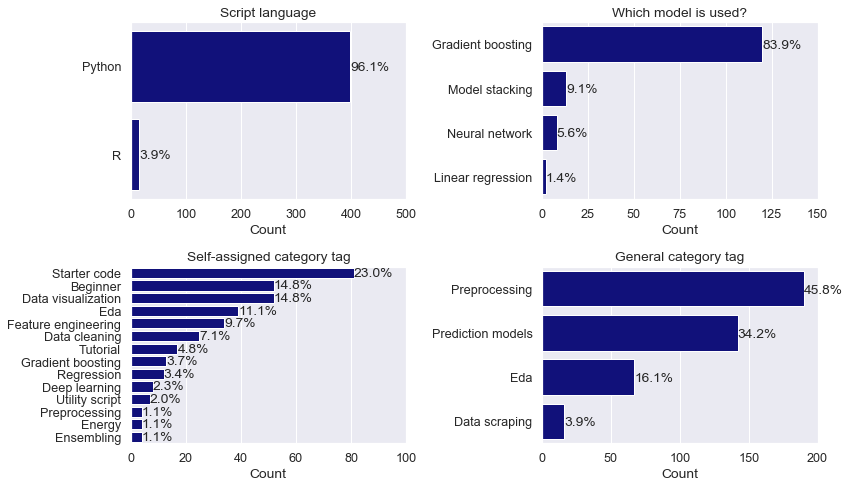

In [7]:
nr_rows = 2
nr_cols = 2

color = "darkblue"
sns.set(font_scale = 1.15)
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*6,nr_rows*3.5))

#Fig 1: Script language
colName='languageName'
title='Script language'
# Temporary dataset
df_temp = df_notebooks[colName].value_counts().sort_values(ascending=False)
df_temp = pd.DataFrame(df_temp)
df_temp.columns = ['Count']
df_temp = df_temp.reset_index()
df_temp.rename(columns={'index':colName}, inplace=True)
# Plot
ax1 = sns.barplot(y=colName, x="Count", data=df_temp, color= color, ax = axs[0][0])
ax1.title.set_text(title)
ax1.set(ylabel="", xlim=(0, 500))
# Adds percentage 
total = df_temp['Count'].sum().sum()
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/1.8
        ax1.annotate(percentage, (x, y))
        
#Fig 2: Which model is used?
colName='Models\t'
title='Which model is used?'
# Temporary dataset
df_temp = df_notebooks[colName].value_counts().sort_values(ascending=False)
df_temp = pd.DataFrame(df_temp)
df_temp.columns = ['Count']
df_temp = df_temp.reset_index()
df_temp.rename(columns={'index':colName}, inplace=True)
df_temp[colName] = df_temp[colName].str.capitalize()
# Plot
ax2 = sns.barplot(y=colName, x="Count", data=df_temp, color= color, ax = axs[0][1])
ax2.title.set_text(title)
ax2.set(ylabel="", xlim=(0, 150))
# Adds percentage 
total = df_temp['Count'].sum().sum()
for p in ax2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/1.6
        ax2.annotate(percentage, (x, y))
        
#Fig 3: Self-assigned category tag
colName='tag'
title = 'Self-assigned category tag'
# Temporary dataset
list_tags = np.reshape(df_notebooks['tags'].to_list(), (1,-1)).tolist()[0]
dict_tags = {tag:list_tags.count(tag) for tag in list_tags}
df_tags_count = pd.DataFrame.from_dict(dict_tags, orient='index').sort_values(0, ascending=False).drop('nan')
df_tags_count = df_tags_count.reset_index().rename(columns={'index':'tag', 0:'Count'})
df_tags_count = df_tags_count[df_tags_count['Count']>3]
df_tags_count[colName] = df_tags_count[colName].str.capitalize()
# Plot
ax3 = sns.barplot(y=colName, x="Count", data=df_tags_count, color= color, ax = axs[1][0])
ax3.title.set_text(title)
ax3.set(ylabel="", xlim=(0, 100))
# Adds percentage 
total = df_tags_count['Count'].sum().sum()
for p in ax3.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/1.2
        ax3.annotate(percentage, (x, y))

#Fig 4: General category tag
colName='category'
title='General category tag'
# Temporary dataset
df_temp = df_notebookWithMedals[colName].value_counts().sort_values(ascending=False)
df_temp = pd.DataFrame(df_temp)
df_temp.columns = ['Count']
df_temp = df_temp.reset_index()
df_temp.rename(columns={'index':colName}, inplace=True)
df_temp[colName] = df_temp[colName].str.capitalize()
# Plot
ax4 = sns.barplot(y=colName, x="Count", data=df_temp, color= color, ax = axs[1][1])
ax4.title.set_text(title)
ax4.set(ylabel="", xlim=(0, 200))
# Adds percentage 
total = df_temp['Count'].sum().sum()
for p in ax4.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/1.6
        ax4.annotate(percentage, (x, y))
        
plt.tight_layout()    
fig.savefig("notebook_summary.png", dpi=300)